In [18]:
import geopandas as gpd
import pygmt
import fiona
import re
import pandas as pd
import numpy as np
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
kml = 'Oahu_Surf_Spots.kml'

In [3]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
oahu_surf_spots_df = gpd.read_file(kml, driver='KML')

In [4]:
oahu_surf_spots_df

,Name,Description,geometry
0,Browns,,POINT Z (-157.79818 21.25440 0.00000)
1,Diamond Head Cliffs,,POINT Z (-157.80529 21.25288 0.00000)
2,Beach Access and Paddle out for DiamondHead Cl...,,"LINESTRING Z (-157.80806 21.25571 0.00000, -15..."
3,Lighthouse,Intermediate/ Expert shortboard spot. Fast hol...,POINT Z (-157.80796 21.25194 0.00000)
4,Tongs,,POINT Z (-157.82091 21.25687 0.00000)
...,...,...,...
141,Ewa Beach Park,,POINT Z (-157.99090 21.31180 0.00000)
142,Lots,,POINT Z (-157.99496 21.31123 0.00000)
143,Diamond Head Cliffs,,POINT Z (-157.80409 21.25304 0.00000)
144,Suicides,,POINT Z (-157.81885 21.25440 0.00000)


In [5]:
oahu_surf_spots_df.dtypes

Name             object
Description      object
geometry       geometry
dtype: object

In [7]:
os_dict=dict(oahu_surf_spots_df)

In [8]:
os_dict.keys()

dict_keys(['Name', 'Description', 'geometry'])

In [9]:
os_dict['geometry'].values

<GeometryArray>
[          <shapely.geometry.point.Point object at 0x0000017DDD1B5000>,
 ...
Length: 146, dtype: geometry

In [10]:
os_points = oahu_surf_spots_df[oahu_surf_spots_df.geometry.geom_type == 'Point']
os_points

,Name,Description,geometry
0,Browns,,POINT Z (-157.79818 21.25440 0.00000)
1,Diamond Head Cliffs,,POINT Z (-157.80529 21.25288 0.00000)
3,Lighthouse,Intermediate/ Expert shortboard spot. Fast hol...,POINT Z (-157.80796 21.25194 0.00000)
4,Tongs,,POINT Z (-157.82091 21.25687 0.00000)
6,Rice Bowl,,POINT Z (-157.82367 21.25696 0.00000)
...,...,...,...
141,Ewa Beach Park,,POINT Z (-157.99090 21.31180 0.00000)
142,Lots,,POINT Z (-157.99496 21.31123 0.00000)
143,Diamond Head Cliffs,,POINT Z (-157.80409 21.25304 0.00000)
144,Suicides,,POINT Z (-157.81885 21.25440 0.00000)


In [11]:
os_LINESTRINGS = oahu_surf_spots_df[oahu_surf_spots_df.geometry.geom_type == 'LineString']
os_LINESTRINGS

,Name,Description,geometry
2,Beach Access and Paddle out for DiamondHead Cl...,,"LINESTRING Z (-157.80806 21.25571 0.00000, -15..."
5,Tongs Beach Access,,"LINESTRING Z (-157.81920 21.25882 0.00000, -15..."
9,paddle out to old mans,,"LINESTRING Z (-157.82180 21.26216 0.00000, -15..."
10,Parking for Old Mans & Tongs,,"LINESTRING Z (-157.82026 21.26226 0.00000, -15..."
18,"Parking for Canoes, Queens, Publics, Old Mans",,"LINESTRING Z (-157.82214 21.27009 0.00000, -15..."
19,"Parking for Pops, Canoes, Queens",Parking currently costs 25 cents per hour in t...,"LINESTRING Z (-157.82122 21.27140 0.00000, -15..."
22,Paid Parking for Threes & Fours,,"LINESTRING Z (-157.83534 21.28390 0.00000, -15..."
23,Paid Parking for Threes & Fours,Military ID gets a decent discount. No ID and ...,"LINESTRING Z (-157.83264 21.27962 0.00000, -15..."
29,Parking for Bolws and Kaisers,,"LINESTRING Z (-157.84337 21.28503 0.00000, -15..."
38,Parking for Kwalos,,"LINESTRING Z (-157.85844 21.29128 0.00000, -15..."


In [12]:
def coords(geom):
    return list(geom.coords)
coords = os_LINESTRINGS.apply(lambda row: coords(row.geometry), axis=1)

In [13]:
lines_df = pd.DataFrame(coords)
lines_df

,0
2,"[(-157.808065, 21.255706, 0.0), (-157.80807, 2..."
5,"[(-157.819198, 21.258816, 0.0), (-157.81888, 2..."
9,"[(-157.8218, 21.26216, 0.0), (-157.82297, 21.2..."
10,"[(-157.820256, 21.262261, 0.0), (-157.819397, ..."
18,"[(-157.822139, 21.270089, 0.0), (-157.821736, ..."
19,"[(-157.821224, 21.271399, 0.0), (-157.820352, ..."
22,"[(-157.83534, 21.283896, 0.0), (-157.834439, 2..."
23,"[(-157.832637, 21.279617, 0.0), (-157.831993, ..."
29,"[(-157.843366, 21.285034, 0.0), (-157.840405, ..."
38,"[(-157.85844, 21.291284, 0.0), (-157.857667, 2..."


In [14]:
lines_lat_lon=[]
for index, row in lines_df.iterrows():
    coords = row[0][1]
    lines_lat_lon.append(coords)

In [15]:
lines_lat_lon

[(-157.80807, 21.255596, 0.0),
 (-157.81888, 21.258971, 0.0),
 (-157.82297, 21.26183, 0.0),
 (-157.819397, 21.261351, 0.0),
 (-157.821736, 21.268295, 0.0),
 (-157.820352, 21.271484, 0.0),
 (-157.834439, 21.282846, 0.0),
 (-157.831993, 21.280817, 0.0),
 (-157.840405, 21.281345, 0.0),
 (-157.857667, 21.291264, 0.0),
 (-157.860903, 21.290453, 0.0),
 (-157.861583, 21.291264, 0.0),
 (-157.863386, 21.293911, 0.0),
 (-157.8649, 21.292958, 0.0),
 (-157.875064, 21.302309, 0.0),
 (-158.087656, 21.620449, 0.0),
 (-158.089335, 21.619562, 0.0),
 (-158.086323, 21.6174, 0.0),
 (-158.074894, 21.629021, 0.0),
 (-158.074009, 21.627438, 0.0),
 (-158.074961, 21.628587, 0.0),
 (-158.072888, 21.630498, 0.0),
 (-158.072477, 21.630238, 0.0),
 (-158.072056, 21.630219, 0.0),
 (-158.048147, 21.667771, 0.0),
 (-158.047468, 21.667434, 0.0),
 (-157.740699, 21.453283, 0.0),
 (-157.739519, 21.453817, 0.0),
 (-157.741042, 21.453687, 0.0),
 (-157.744553, 21.453387, 0.0),
 (-157.722092, 21.395431, 0.0),
 (-157.740961, 2

### Work on Weather Station Data

In [57]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [58]:
measurement_data=session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs)
measurement_df=pd.DataFrame(measurement_data)
measurement_df

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [60]:
stations_data = session.query(Station.id,
                                  Station.station,
                                  Station.name,
                                  Station.longitude,
                                  Station.latitude,
                                  Station.elevation
                                  ).all()
stations_df=pd.DataFrame(stations_data)
stations_df

,id,station,name,longitude,latitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",-157.81680,21.27160,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",-157.80150,21.42340,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",-157.83740,21.52130,7.0
3,4,USC00517948,"PEARL CITY, HI US",-157.97510,21.39340,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",-158.01110,21.49920,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",-157.71139,21.33556,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",-157.84889,21.45167,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",-157.99920,21.31520,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",-157.80250,21.33310,152.4


In [61]:
station_master_df=measurement_df.merge(stations_df, how='left', on='station')
station_master_df

,id_x,station,date,prcp,tobs,id_y,name,longitude,latitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4
19546,19547,USC00516128,2017-08-20,NaN,78.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4


In [62]:
station_master_df['prcp']=station_master_df['prcp'].fillna(0)
station_master_df

,id_x,station,date,prcp,tobs,id_y,name,longitude,latitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
4,5,USC00519397,2010-01-06,0.00,73.0,1,"WAIKIKI 717.2, HI US",-157.8168,21.2716,3.0
...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4
19546,19547,USC00516128,2017-08-20,0.00,78.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",-157.8025,21.3331,152.4


## Make some Maps

grdblend [ERROR]: Failed to remove C:\Users\jonat\AppData\Local\Temp/grdblend_resampled_a10732.nc! [remove error: Permission denied]
grdblend [ERROR]: Failed to delete file C:\Users\jonat\AppData\Local\Temp/grdblend_resampled_a10732.nc
C:\Users\jonat\anaconda3\envs\GMT\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


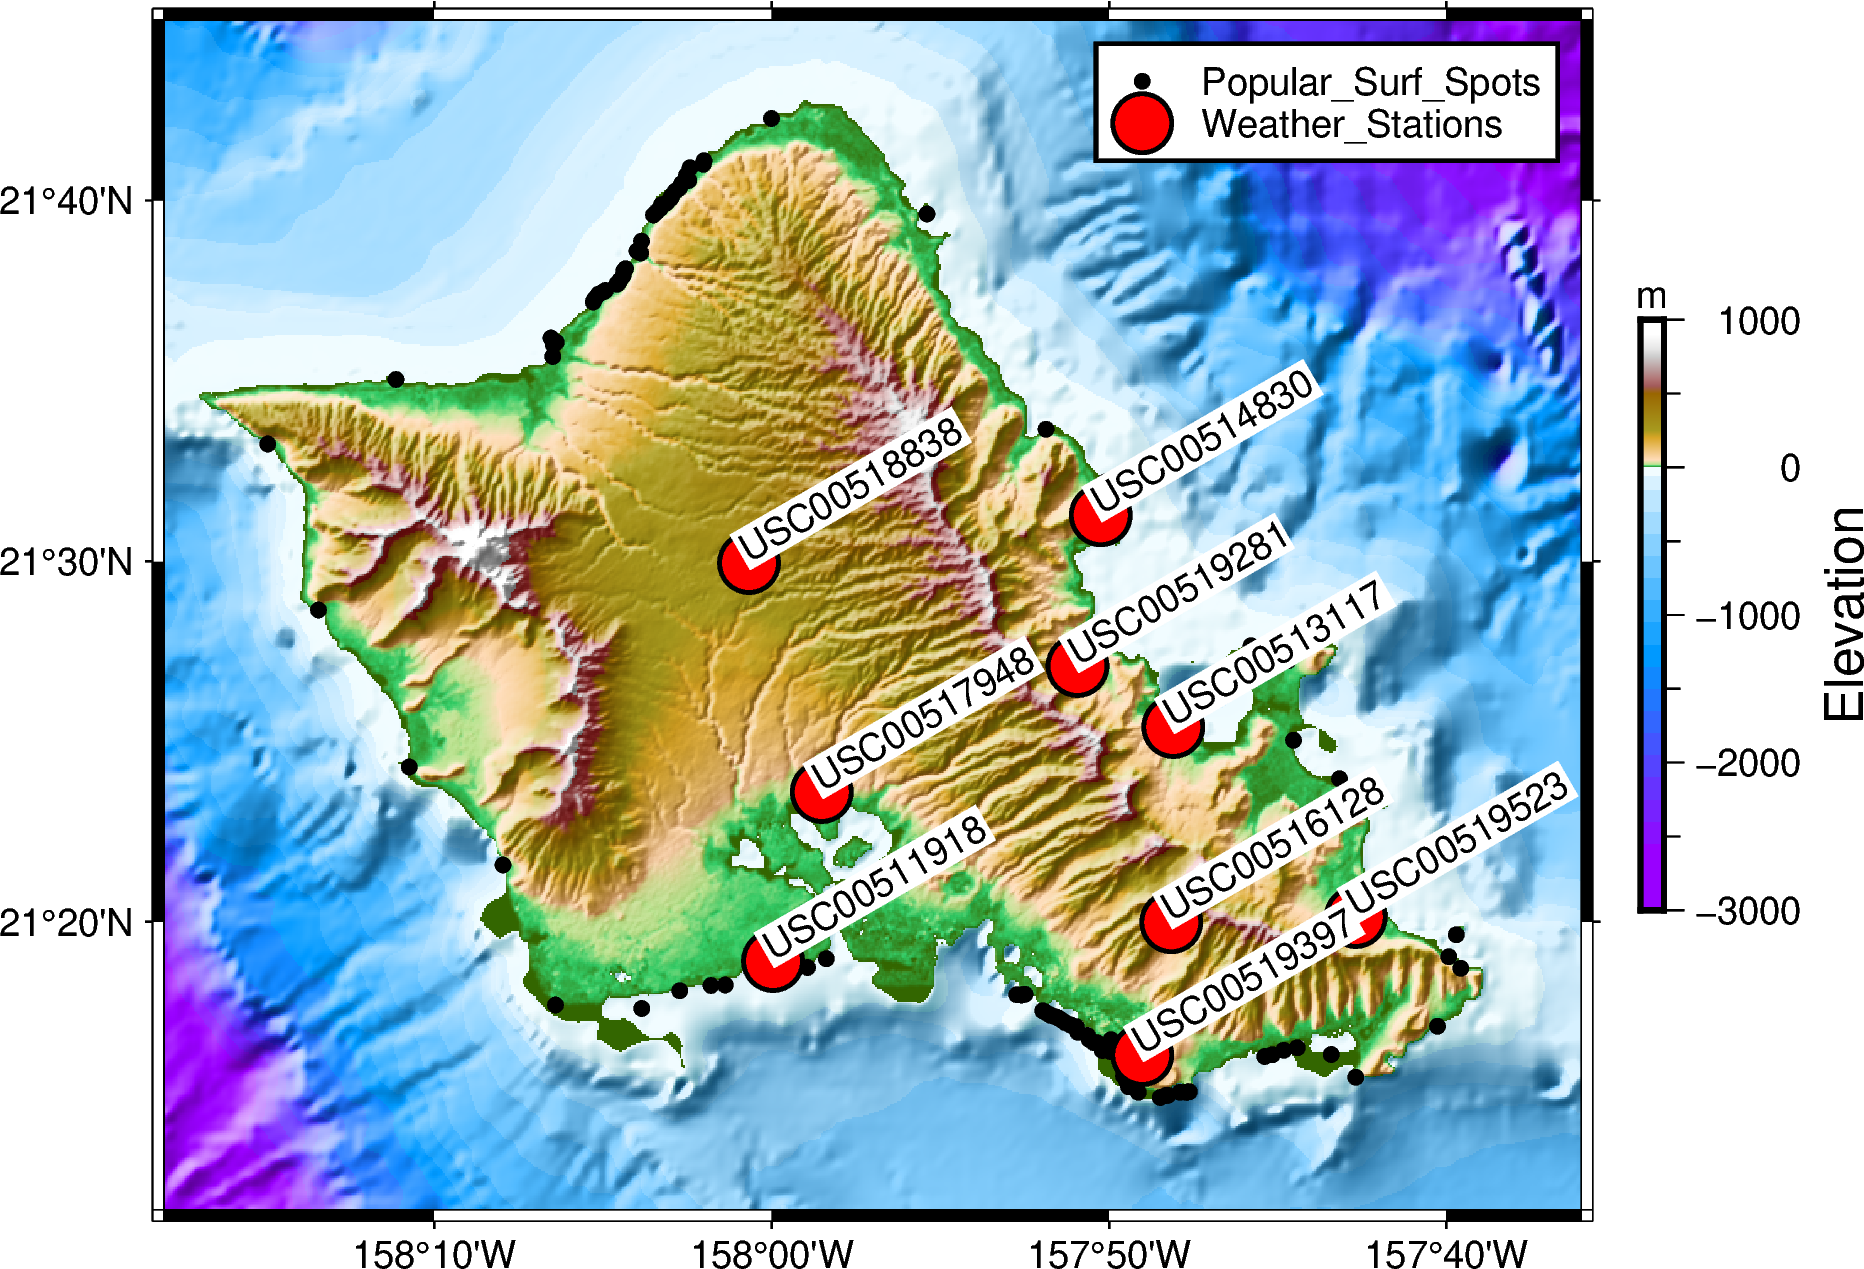

In [65]:
fig = pygmt.Figure()

#Define The lat long region around Oahu
region = [-158.3, -157.6, 21.2, 21.75]  # xmin, xmax, ymin, ymax

# Load sample grid (3 arc second global relief) in target area
grid = pygmt.datasets.load_earth_relief(resolution="03s", region=region)

#MOST LIKELY WILL NOT USE BUT USEFUL
# Can be plotted alone as a "Hillshade"
# calculate the reflection of a light source projecting from west to east
# (azimuth of 270 degrees) and at a latitude of 30 degrees from the horizon
# Try replacing this grid in the grdimage for the grid argument to see what it looks like
dgrid = pygmt.grdgradient(grid=grid, radiance=[270, 30])

#Define the color map to be used for plotting the 
#elevation model and elevation bounds 0f -3000 bsl m and 1000m asl
pygmt.makecpt(cmap="globe", series=[-3000, 1000])

#plot the elevation grid and 
fig.grdimage(
    grid=grid, 
    projection="M12c", 
    region=region, 
    frame="a",
    shading="+d"
            )

#Illustrate the color bar to show the color representation of the elevation
fig.colorbar(
    #Define the postion to the right of the map and make it a vertical colorbar
    position="JMR+o0.5c/0c+w5c",
    #Ticks every 500 m and annotate every 1km, add a label for elevation
    frame=["a1000f500", "x+lElevation", "y+lm"]
)

#Plot the locations derived from the xml surf locations file
fig.plot(
    data=os_points.geometry, 
    style="c0.1c", 
    color="black", 
    label="Popular_Surf_Spots",
    pen="1p"
)

#Plot the locations of the weather stations
fig.plot(
    x=stations_df.longitude, 
    y=stations_df.latitude, 
    style="c0.5c", 
    color="red", 
    label="Weather_Stations",
    pen="1p"
)

#Plots the labels wo we know which station is which
fig.text(
    text=stations_df.station, 
    x=stations_df.longitude, 
    y=stations_df.latitude, 
    fill="white", 
    angle=30,
    justify="BL"
)

#Add a legend to show the two different symbols we use for surf locations and weather stations
fig.legend() 

fig.show()